<a href="https://colab.research.google.com/github/Ifra96/BDP-cont./blob/main/BDP_combined_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
import nltk.stem
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu','frankly','use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book5.xlsx to Book5.xlsx


In [ ]:
pip install xlrd

In [ ]:
df = pd.read_excel("Book5.xlsx")
print(df)

                    Document                                               text
0         Boris-address-.txt  Never in the history of our species - not sinc...
1  Chinese-Pres-address-.txt  Mr.President, Colleagues, This year marks the ...
2         Modhi-address-.txt  Respected President of the General Assembly. O...
3            NZ-address-.txt  E nga mana, e nga reo, (Prestigious people, sp...
4            Pak-adress-.txt  Mr. President, Secretary General Guterres,  Ex...
5         Putin-address-.txt  Mr. President, Mr. Secretary-General, colleagu...
6     Singapore-address-.txt  Mr President Secretary-General Excellencies La...
7          Trump-address.txt  It is my profound honor to address the United ...


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['never', 'in', 'the', 'history', 'of', 'our', 'species', 'not', 'since', 'the', 'almighty', 'felled', 'the', 'tower', 'of', 'babel', 'has', 'the', 'human', 'race', 'been', 'so', 'obsessed', 'with', 'one', 'single', 'topic', 'of', 'conversation', 'we', 'have', 'been', 'following', 'the', 'same', 'debates', 'researching', 'the', 'potential', 'of', 'the', 'same', 'drugs', 'and', 'time', 'and', 'again', 'we', 'have', 'been', 'typing', 'the', 'same', 'word', 'into', 'our', 'search', 'engines', 'covid', 'coronavirus', 'has', 'united', 'humanity', 'as', 'never', 'before', 'and', 'yet', 'the', 'crisis', 'has', 'also', 'been', 'an', 'extraordinary', 'force', 'for', 'division', 'we', 'have', 'all', 'been', 'up', 'against', 'the', 'same', 'enemy', 'the', 'same', 'tiny', 'opponent', 'threatening', 'everyone', 'in', 'much', 'the', 'same', 'way', 'but', 'members', 'of', 'the', 'un', 'have', 'still', 'waged', 'separate', 'campaigns', 'as', 'if', 'every', 'country', 'somehow', 'contains', 'different

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [ ]:
data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model #chose number of topics extracted to be around 4
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.016*"country" + 0.010*"world" + 0.010*"global" + 0.010*"must" + '
  '0.008*"people" + 0.008*"development" + 0.008*"peace" + '
  '0.006*"international" + 0.006*"year" + 0.005*"virus"'),
 (1,
  '0.008*"state" + 0.008*"people" + 0.006*"country" + 0.006*"work" + '
  '0.006*"provide" + 0.006*"well" + 0.006*"global" + 0.006*"world" + '
  '0.005*"international" + 0.005*"war"'),
 (2,
  '0.001*"country" + 0.001*"global" + 0.001*"world" + 0.001*"development" + '
  '0.001*"year" + 0.001*"people" + 0.001*"must" + 0.001*"peace" + '
  '0.001*"vaccine" + 0.001*"international"'),
 (3,
  '0.017*"country" + 0.015*"world" + 0.010*"global" + 0.008*"today" + '
  '0.007*"vaccine" + 0.006*"year" + 0.006*"pandemic" + 0.006*"people" + '
  '0.006*"human" + 0.005*"covid"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 4.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=4aa85e2f36fe4967f8ee20d6ec78bc0785db5d2a10855f445e1fcfa36936a32d
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.055057  0.079906       1        1  53.723131
3      0.103094  0.006674       2        1  27.729734
1     -0.046974 -0.078832       3        1  18.511297
2     -0.001063 -0.007749       4        1   0.035839, topic_info=             Term       Freq      Total Category  logprob  loglift
1205        state  21.000000  21.000000  Default  30.0000  30.0000
869          well  14.000000  14.000000  Default  29.0000  29.0000
530         world  60.000000  60.000000  Default  28.0000  28.0000
613   development  27.000000  27.000000  Default  27.0000  27.0000
847         today  22.000000  22.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
1445     military   0.001124  11.057189   Topic4  -7.4847  -1.2598
311         never   0.001129  12.867948   Topic4  -7.4801  -1.4069
667        future   0.001131  14.092929   Topic4  -7.4791  -1.4968
778       provide   0.001133  15.813256   Topic4  -7.4770  -1.6099
528          work   0.001132  23.250024   Topic4  -7.4777  -1.9959

[299 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1597      3  0.791229      ably
1599      3  0.791434  accurate
537       1  0.759770   achieve
537       2  0.138140   achieve
537       3  0.138140   achieve
...     ...       ...       ...
532       1  0.589215      year
532       2  0.327341      year
532       3  0.065468      year
1831      3  0.791502      zone
534       2  0.954001  zoonotic

[374 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2297508095888237


In [ ]:
from gensim.models.wrappers import LdaMallet

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-12-01 22:53:47--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2021-12-01 22:53:48--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.55MB/s    in 2.8s    

2021-12-01 22:53:52 (5.55 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive

Mounted at /content/gdrive
/content/gdrive


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(4,
  [('indian', 0.038834951456310676),
   ('develop', 0.03398058252427184),
   ('rich', 0.02912621359223301),
   ('resolution', 0.02912621359223301),
   ('poor', 0.024271844660194174),
   ('money', 0.024271844660194174),
   ('direct', 0.024271844660194174),
   ('process', 0.024271844660194174),
   ('financial', 0.019417475728155338),
   ('violation', 0.019417475728155338)]),
 (1,
  [('partner', 0.04419889502762431),
   ('find', 0.03867403314917127),
   ('advance', 0.03314917127071823),
   ('issue', 0.03314917127071823),
   ('trade', 0.03314917127071823),
   ('month', 0.027624309392265192),
   ('medicine', 0.027624309392265192),
   ('day', 0.027624309392265192),
   ('restriction', 0.022099447513812154),
   ('vaccination', 0.022099447513812154)]),
 (19,
  [('lead', 0.06862745098039216),
   ('mr_president', 0.058823529411764705),
   ('address', 0.04411764705882353),
   ('measure', 0.029411764705882353),
   ('debt', 0.029411764705882353),
   ('target', 0.024509803921568627),
   ('dialog

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=40, step=6)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is

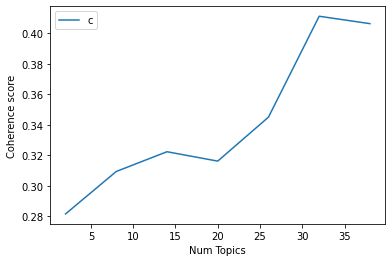

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2815
Num Topics = 8  has Coherence Value of 0.3094
Num Topics = 14  has Coherence Value of 0.3223
Num Topics = 20  has Coherence Value of 0.3162
Num Topics = 26  has Coherence Value of 0.345
Num Topics = 32  has Coherence Value of 0.4112
Num Topics = 38  has Coherence Value of 0.4063


In [ ]:
# Select the model and print the topics #optimal model
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(1,
  '0.109*"people" + 0.088*"pandemic" + 0.054*"free" + 0.048*"find" + '
  '0.041*"life" + 0.034*"era" + 0.034*"point" + 0.027*"show" + 0.027*"drug" + '
  '0.020*"part"'),
 (12,
  '0.198*"year" + 0.064*"force" + 0.059*"fight" + 0.053*"found" + '
  '0.048*"policy" + 0.043*"security" + 0.021*"move" + 0.021*"respect" + '
  '0.021*"century" + 0.016*"start"'),
 (26,
  '0.074*"approach" + 0.043*"deal" + 0.043*"decade" + 0.032*"fail" + '
  '0.032*"bless" + 0.032*"put" + 0.021*"flight" + 0.021*"emission" + '
  '0.021*"receive" + 0.021*"agreement"'),
 (3,
  '0.155*"people" + 0.132*"international" + 0.087*"ensure" + 0.082*"support" + '
  '0.041*"call" + 0.041*"remain" + 0.041*"sustainable" + 0.037*"affect" + '
  '0.023*"involve" + 0.023*"order"'),
 (25,
  '0.106*"vaccine" + 0.049*"treatment" + 0.049*"trial" + 0.049*"ready" + '
  '0.042*"reach" + 0.042*"pandemic" + 0.042*"begin" + 0.035*"risk" + '
  '0.035*"campaign" + 0.021*"tariff"'),
 (6,
  '0.106*"global" + 0.096*"war" + 0.066*"effort" + 0

In [ ]:
import pandas
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data): #dominant topic for each document
    # Init output
    sent_topics_df = pd.DataFrame()
    pandas.set_option('display.max_colwidth', 100)

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,25.0,0.1615,"vaccine, treatment, trial, ready, reach, pandemic, begin, risk, campaign, tariff",Never in the history of our species - not since the Almighty felled the Tower of Babel - has the...
1,1,19.0,0.1733,"development, share, major, pursue, economic, trend, governance, remind, role, win","Mr.President, Colleagues, This year marks the 75th anniversary of the victory in the World Anti-..."
2,2,31.0,0.1949,"world, today, member, time, india, excellency, economy, welfare, hundred, essential",Respected President of the General Assembly. On behalf of over 1.3 billion people of India. I wo...
3,3,21.0,0.1830,"vaccine, woman, weapon, share, nuclear, impact, focus, million, economic, region","E nga mana, e nga reo, (Prestigious people, speakers of note,)E nga mana, e nga reo, (Prestigiou..."
4,4,2.0,0.1369,"indian, process, direct, settlement, solution, money, occupy, rich, relief, responsibility","Mr. President, Secretary General Guterres, Excellencies, Ladies and Gentlemen, I am honoured t..."
5,5,20.0,0.0867,"state, political, include, conflict, action, threat, regional, part, environment, law","Mr. President, Mr. Secretary-General, colleagues, ladies and gentlemen, This year, the internati..."
6,6,5.0,0.1415,"achieve, future, challenge, build, multilateral, solution, level, defeat, small, peaceful",Mr President Secretary-General Excellencies Ladies and gentlemen The world was changing even bef...
7,7,26.0,0.1501,"approach, deal, decade, fail, bless, put, flight, emission, receive, agreement",It is my profound honor to address the United Nations General Assembly. Seventy-five years afte...


In [ ]:
# Group top 5 sentences under each topic 
sent_topics_sorteddf_mallet = pd.DataFrame()
pandas.set_option('display.max_colwidth', 100)
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10) #most representative topic for each document

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,2.0,0.1369,"indian, process, direct, settlement, solution, money, occupy, rich, relief, responsibility","Mr. President, Secretary General Guterres, Excellencies, Ladies and Gentlemen, I am honoured t..."
1,5.0,0.1415,"achieve, future, challenge, build, multilateral, solution, level, defeat, small, peaceful",Mr President Secretary-General Excellencies Ladies and gentlemen The world was changing even bef...
2,19.0,0.1733,"development, share, major, pursue, economic, trend, governance, remind, role, win","Mr.President, Colleagues, This year marks the 75th anniversary of the victory in the World Anti-..."
3,20.0,0.0867,"state, political, include, conflict, action, threat, regional, part, environment, law","Mr. President, Mr. Secretary-General, colleagues, ladies and gentlemen, This year, the internati..."
4,21.0,0.1830,"vaccine, woman, weapon, share, nuclear, impact, focus, million, economic, region","E nga mana, e nga reo, (Prestigious people, speakers of note,)E nga mana, e nga reo, (Prestigiou..."
5,25.0,0.1615,"vaccine, treatment, trial, ready, reach, pandemic, begin, risk, campaign, tariff",Never in the history of our species - not since the Almighty felled the Tower of Babel - has the...
6,26.0,0.1501,"approach, deal, decade, fail, bless, put, flight, emission, receive, agreement",It is my profound honor to address the United Nations General Assembly. Seventy-five years afte...
7,31.0,0.1949,"world, today, member, time, india, excellency, economy, welfare, hundred, essential",Respected President of the General Assembly. On behalf of over 1.3 billion people of India. I wo...
